In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [23]:
import os

path = os.listdir('G:/Rathod MAM Reasearch Paper work/Data')
classes = {'no cancer':0, 'cancer':1}

In [24]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'G:/Rathod MAM Reasearch Paper work/Data/Train/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [25]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [26]:
np.unique(Y)

array([0, 1])

In [27]:
pd.Series(Y).value_counts()
X.shape, X_updated.shape

((811, 200, 200), (811, 40000))

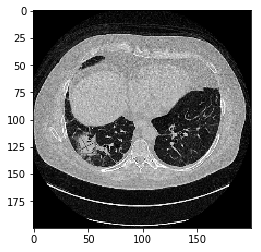

In [28]:
plt.imshow(X[0], cmap='gray')

In [29]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(811, 40000)

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_feature=SelectKBest(score_func=chi2,k='all')
fit=best_feature.fit(xtrain,ytrain)

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [32]:
xtrain.shape, xtest.shape

((648, 40000), (163, 40000))

In [33]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [34]:
from sklearn.decomposition import PCA

In [35]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(648, 40000) (163, 40000)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [37]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [38]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [39]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9938650306748467


In [40]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9938650306748467


In [41]:
from sklearn.model_selection import cross_val_score
accuries=cross_val_score(estimator=lg,X=xtrain,y=ytrain,cv=10)
print('accuracy is {:.2f} %'.format(accuries.mean()*100))
print('standard deviation{:.2f} %'.format(accuries.std()*100))


accuracy is 98.46 %
standard deviation1.19 %


In [ ]:
from sklearn.model_selection import cross_val_score
accuries=cross_val_score(estimator=sv,X=xtrain,y=ytrain)
print('accuracy is {:.2f} %'.format(accuries.mean()*100))
print('standard deviation{:.2f} %'.format(accuries.std()*100))
